# Part I - (201902-fordgobike-tripdata Communicate Data Findings)
## by (Martha Mwangi)

## Introduction
> Introduce the dataset

Ford GoBike System Data is a dataset that includes information about individual rides made in a bike sharing system in San Francisco Bay area. 
The dataset originally had 16 columns, but during exploration 3 more columns were added to facilitate analysis of data. The three columns are: time_of_day, day_of_week and month_of_year. The other columns include:

1. duration_sec: Time a trip lasts in seconds.
2. start_time: Time at the start of a trip.
3. end_time: Time when a trip ends.
4. start_station_id: unique Station identifier where a trip is started.
5. start_station_name: Name of the station where a trip starts.
6. start_station_latitude: Latitute of the station where the trip begins.
7. start_station_longitude: Longitude of the station where the trip begins.
8. end_station_id: Unique Station identifier where a trip ends.
9. end_station_name: Name of the station where a trip ends.
10. end_station_latitude: Latitude of the station where the trip ends.
11. end_station_longitude: Longitude of station where the trip ends.
12. bike_id: unique identifier of a bike..
13. user_type: Indicates whether a user is subscribed to the system or not.
14. member_birth_year: Year a member was born.
15. member_gender: specifies the gender of a user.
16. bike_share_for_all_trip: indicates whether a bike is shared in the round of trip.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
plt.style.use('seaborn')

%matplotlib inline

Loading in data and parsing the date columns


In [2]:
dateparser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')
bikedf = pd.read_csv('201902-fordgobike-tripdata.csv', parse_dates =['start_time', 'end_time'], date_parser=dateparser)
bikedf.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### What is the structure of your dataset?

> The dataset is comprised of rows and columns of data.

### What is/are the main feature(s) of interest in your dataset?

> Features of interest in the dataset is determining the duration of a trip and the time most trips are taken.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>The duration of trip, the date and the kind of user will be key determinants in the investigation of the dataset. 

Check for duplicates in the dataset.

In [3]:
bikedf.duplicated().sum()

0

Viewing the info() of the dataframe, it shows presence of na values. Since they are just a few as compared to the rest chunk of data, we are going to drop

In [4]:
# Drop NaN values
bikedf.dropna(inplace=True)

Slice of the decimal values in the member year column to ensure we have correct values for the year column, after which we will be all set to go.

In [5]:
# slice off the decimal values from the member year column
bikedf['member_birth_year'] = (bikedf['member_birth_year']).map(lambda x: str(x)[:-2])

## Univariate Exploration

## When are most trips taken in terms of time of day, day of the week, or month of the year?

To determine when most trips are taken, we will need to add extra colums to hold time of the day, day of week and month of the year. Here, we will use the datetime module on the bikedf['start_time'] column.

In [6]:
# Add a column for day of the week
bikedf['day_of_week'] = bikedf['start_time'].dt.day_name()

In [7]:
# Add a column for the month of the year
bikedf['month_of_year'] = bikedf['end_time'].dt.month_name()

In [8]:
# Add a colum for the hour of the day
bikedf['time_of_day'] = bikedf['start_time'].dt.hour

In [9]:
# Apply the zfill on time of the day to pad single digit numbers with a leading zero
bikedf['time_of_day'] = bikedf['time_of_day'].map(lambda x: str(x).zfill(2))

In [10]:
# Lets check to make sure the columns were added appropriately.
bikedf.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_of_week,month_of_year,time_of_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Thursday,March,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,Thursday,March,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,Thursday,March,17


In [11]:
# Get the total count of trips in each hour of the day
hour_count = {}

for h in bikedf['time_of_day']:
    hour_count[h] = hour_count.get(h, 0) + 1
hour = []
tripcount = []
for trip in hour_count.items():
    hour.append(int(trip[0]))
    tripcount.append(trip[1])
print(hour)
print(tripcount)
    

[17, 12, 23, 22, 21, 18, 20, 19, 10, 15, 16, 9, 11, 0, 13, 14, 8, 7, 5, 6, 4, 3, 2, 1]
[20904, 8220, 1572, 2793, 4400, 16118, 6211, 9424, 7970, 8646, 13473, 15204, 7461, 893, 8098, 7677, 20227, 10231, 866, 3293, 227, 164, 355, 525]


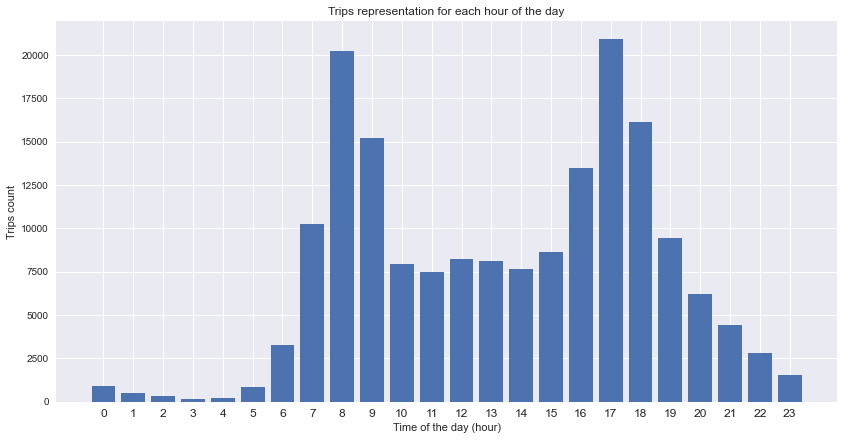

In [12]:
# plot a bar graph of trip count against the hours
def pltgraph(x,y, t, xl, yl):
    plt.figure(figsize = (14, 7))
    plt.bar(x, y)
    plt.title(t)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.xticks(x, size=12);
pltgraph(hour, tripcount,'Trips representation for each hour of the day', 'Time of the day (hour)','Trips count' )

From the chart, it shows that the most trips were taken in the evening hours of 1700 Hrs and at 0800Hrs with over 20,000 trips and reduced as the day progressed towards the morning hours with the least trips being recorded at 0300 hours of just 164 trips.

In [13]:
# Get trips count for each day of the week 
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']

data = bikedf['day_of_week'].value_counts().reindex(day_order)
print(data)

Monday       25641
Tuesday      30584
Wednesday    28426
Thursday     33712
Friday       27663
Saturday     14414
Sunday       14512
Name: day_of_week, dtype: int64


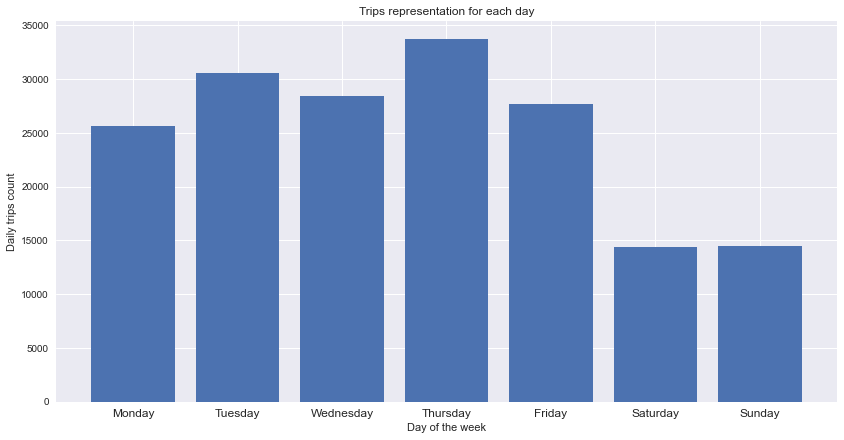

In [14]:
#plot days of the week trip distribution 
pltgraph(data.index, data.values,'Trips representation for each day', 'Day of the week','Daily trips count' )

From the chart, Thursday recorded the most number of trips with over 30,000 trips, followed closely by Tuesday and Thursday. The weekend, being Sunday and Saturday recored the least of trip followed by Monday from a distant.

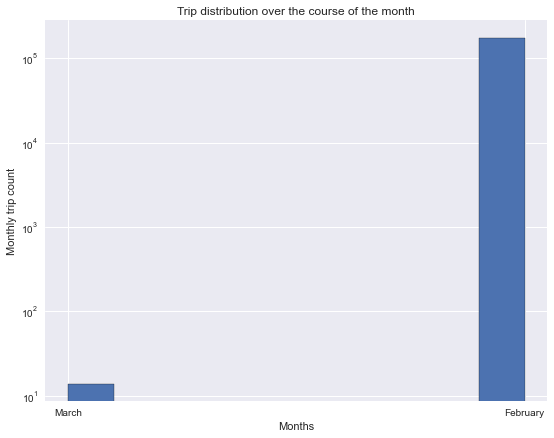

In [15]:
# plot distribution over month of the year
def plt_hist(cl, t,x,y, bins=0):
    plt.figure(figsize = (9, 7))
    plt.hist(cl, edgecolor ='black', log=True)
    plt.title(t)
    plt.ylabel(y)
    plt.xlabel(x)
plt_hist(bikedf['month_of_year'],"Trip distribution over the course of the month" , 'Months','Monthly trip count');

From the dataset, all trips began in the month of february, and ended in february with a few trips crossing over to March. Of the more than 175,000 data entries, only 16 trips lasted betwwen the months of February and March. February can therefore be termed as a high active month.

# How long does the average trip take?

In [16]:
# Get a summary statistics of the duration colmn
bikedf['duration_sec'].describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

From the summary statistics above, the duration column shows that the minimum trip took 61 seconds which is equivalent to 1 minute and the longest trip lasting over 84548 equivalent to more that 23 hours. The mean as is represented in the summary statistics may not paint a true picture of the average trip as it is highly affected by the outlier.

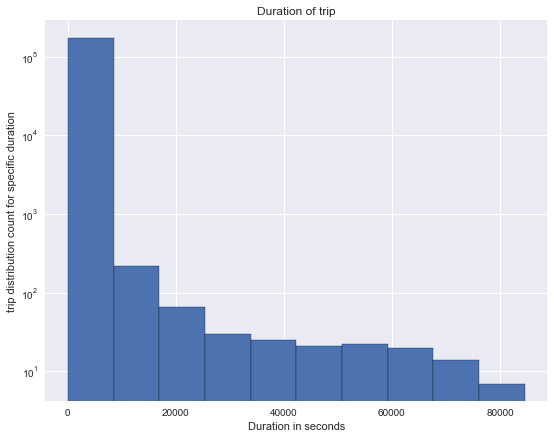

In [17]:
# Hist distribution of trips duration
bins = [100, 1000, 2000, 7000, 14000, 18000, 37000, 47000, 57000, 67000, 77000, 87000]
plt_hist(bikedf['duration_sec'],"Duration of trip" , 'Duration in seconds','trip distribution count for specific duration', bins=bins);

From the histogram, the trips distribution are skewed to the left with most trips lasting about 1800 seconds which shows most trips lasted for less than an hour. 
With most trips lasting for less than half an hour, lets filter these trips and take the summary statistics of the filtered data to get an overview of the average trip duration. 

In [18]:
half_hour_df = bikedf[bikedf['duration_sec'] <=1800]
half_hour_df['duration_sec'].describe()

count    168935.000000
mean        571.337230
std         336.554351
min          61.000000
25%         317.000000
50%         496.000000
75%         751.000000
max        1800.000000
Name: duration_sec, dtype: float64

The average trip lasted for about 571 seconds equivalent to about 9 minutes.

Similarly, let's take the summary statistics of all the trips that took more than 30 minutes and see the average of this trips.

In [19]:
greater_than_half = bikedf[bikedf['duration_sec'] >1800]
greater_than_half['duration_sec'].describe()

count     6017.000000
mean      4428.757354
std       7802.280008
min       1801.000000
25%       2035.000000
50%       2414.000000
75%       3454.000000
max      84548.000000
Name: duration_sec, dtype: float64

For trips that lasted for more than half an hour, averaged at about 4428 seconds which is roughly one hour and 10 minutes or there about. This was a small chunk of the dataset as it represented about 6000 entries out of the total of more than 175000 indicating that taking the average of the whole data as is may be misleading.

## what was the trips distribution across the start station of the trips

(array([40457., 33679., 22898., 15053., 12165.,  8119., 16555.,  7432.,
        10464.,  8130.]),
 array([  3. ,  42.5,  82. , 121.5, 161. , 200.5, 240. , 279.5, 319. ,
        358.5, 398. ]),
 <BarContainer object of 10 artists>)

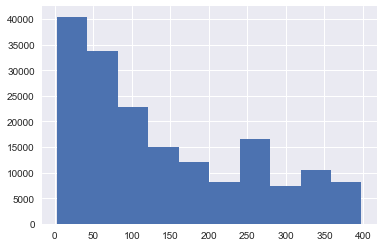

In [20]:
plt.hist(bikedf['start_station_id'])

More trips were registered in the departure stations with identities of less than 140 and reduced to stations with identities of IDs of more than 340.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Distribution of trip duration varied from a a trip taking a minute to longest trip taking over 23 hours. Given this disparity it was necessary to perform logarithmic scaling to make the data look normal shaped and enhance visibility of near negligible values as well as manage outliers.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

To determine when most trips were taken, it was necessary to perform operations on the trip start time column in order to extract the time, day and month in which the trips took place. Rows with null values were dropped to make sure the data is tidy for analysis. The member birth year column was a float number with atleast one decimal place, it was important to clean this up to make the column represent the correct format of the year

## Bivariate Exploration

What are the trends of the trip across days of the week? 

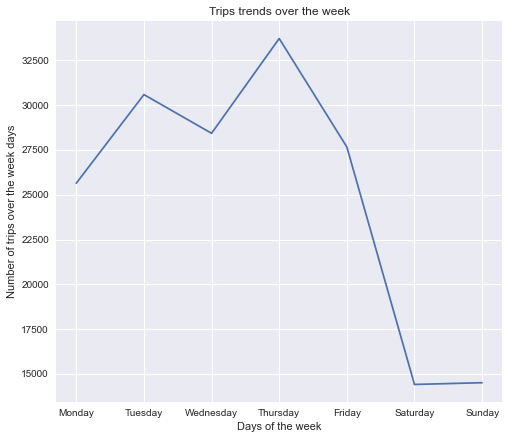

In [21]:
plt.figure(figsize = (8, 7))
plt.plot(data.index, data.values)
plt.title("Trips trends over the week")
plt.ylabel('Number of trips over the week days')
plt.xlabel('Days of the week');

There were less trips over the weekends after which more and more trips were recorded as the week got by, from Monday going up to Tuesday and more trips taking place on a Thursday.

### What is the relations between the duration of a trip and when the time a trip is taken. Is the time of the day a trip is started a factor in how long a trip may take? Let's see this with a scatter plot. 

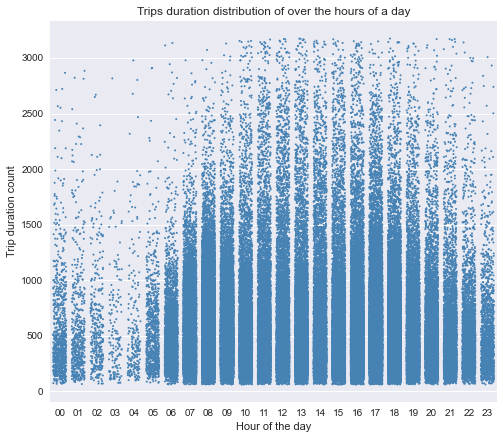

In [22]:
timed_order = sorted(bikedf['time_of_day'].unique());
plt.figure(figsize = (8, 7))

sns.stripplot(data=bikedf.query('duration_sec<duration_sec.quantile(0.99)'),
x='time_of_day', y='duration_sec', size=2,jitter=0.35, color='steelblue', order=timed_order);
plt.title("Trips duration distribution of over the hours of a day")
plt.ylabel('Trip duration count')
plt.xlabel('Hour of the day');

From the distribution above, it shows there was a high concentration of trips in the evening from 1700hrs and 2000hrs.  Also a significant number of trips were recorded in the morning hours of 0800hrs and 0900hrs. Less trips were recorded as the day progressed deep in to the night with the less trips being recorded between 0100hrs and 0400hrs and the least of trips taking place at 0300hrs

## Was day of the week a factor in the trip duration distribution. Were there days that registered significant longer trips than the other days of the week?

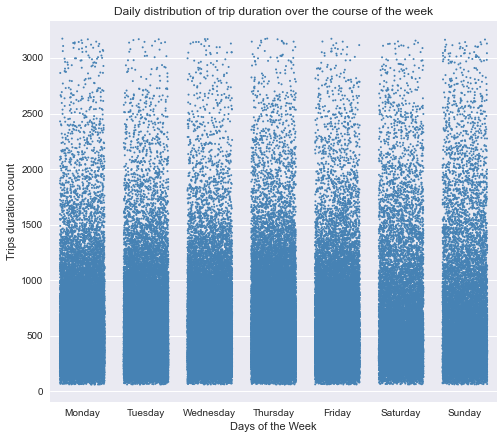

In [23]:
plt.figure(figsize = (8, 7))

sns.stripplot(data=bikedf.query('duration_sec<duration_sec.quantile(0.99)'),
x='day_of_week', y='duration_sec', size=2,jitter=0.35, color='steelblue', order=day_order);
plt.title("Daily distribution of trip duration over the course of the week")
plt.ylabel('Trips duration count')
plt.xlabel('Days of the Week');

Whereas we have reported that Thursday reported more trips than the other days of the week, it's worth noting that the longest trips took place on different days of the week. As is in the distribution, Saturday and Monday recorded longer trips with Wednesday equally recording a significant number of longer trips.

## How Was the bike, identified by bike_id feature in the duration of the trip

Text(0.5, 0, 'Bike id numerics')

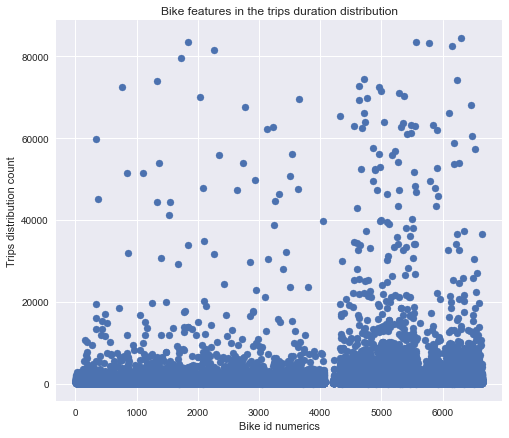

In [24]:
plt.figure(figsize = (8, 7))
plt.scatter(bikedf['bike_id'], bikedf['duration_sec']);
plt.title("Bike features in the trips duration distribution")
plt.ylabel('Trips distribution count')
plt.xlabel('Bike id numerics')

Bikers who took bikes with id higher than 4000 seemingly registered longer trips than those who rode on bikes with identification lowere than 4000.

### Is where a trip starts a factor in how long that trip will take?

Text(0.5, 0, 'Departure Station identifier')

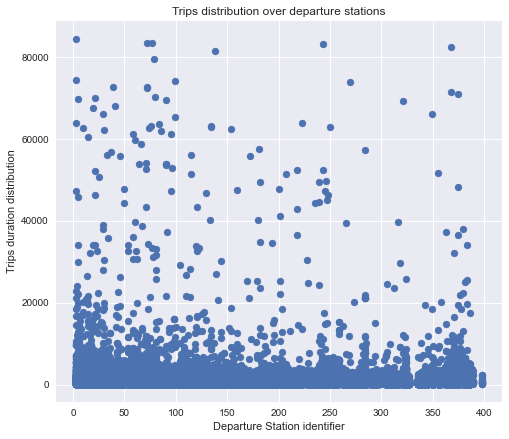

In [25]:
plt.figure(figsize = (8, 7))
plt.scatter(bikedf['start_station_id'], bikedf['duration_sec']);
plt.title("Trips distribution over departure stations")
plt.ylabel('Trips duration distribution')
plt.xlabel('Departure Station identifier')

Departure stations with identifier of less than 100 reported significant more trips as well as longer trip duration. The number of trips and their duration reduced with station departures of IDs more than 340.

### How did trip destination feature in trips distribution and trips duration?

Text(0.5, 0, 'Trip Destination Identifier')

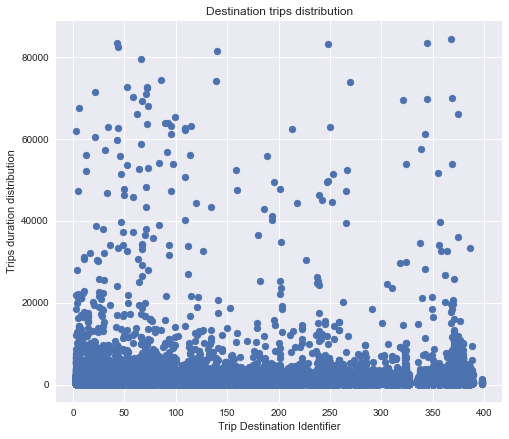

In [26]:
plt.figure(figsize = (8, 7))
plt.scatter(bikedf['end_station_id'], bikedf['duration_sec']);
plt.title("Destination trips distribution")
plt.ylabel('Trips duration distribution')
plt.xlabel('Trip Destination Identifier')

There is a near similar trends between the departure and destination of trips. the distribution shows that, where the trips started and where they ended were not a factor as such in the duration of the trip. However, it can be noted that longer trips were registered in destina stations with identifier of less than 100 or there about as compared to destinations with identifier of more than 400.

### Were the number of trips dependent on whether a user was a subscriber or a customer? How did the user type feature in the trips distribution in the days of the week?

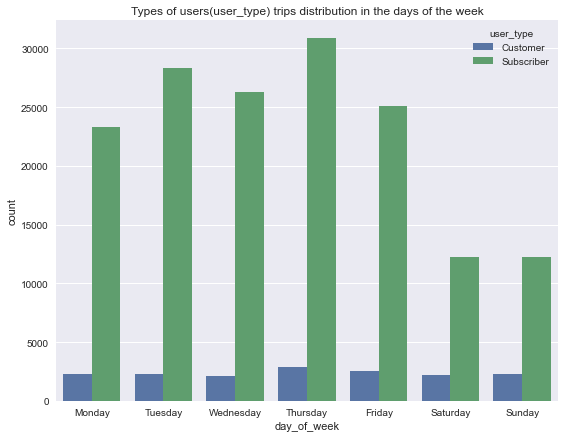

In [27]:
# Clustered plots of the user type feature in the days of the week in the trips data
plt.figure(figsize = (9, 7))
sns.countplot(data=bikedf, x = 'day_of_week', hue='user_type', order=day_order);
plt.title("Types of users(user_type) trips distribution in the days of the week");

The plot goes to show that, most trips were taken by subscribers as has been seen in previous deduction in the analysis process. Days that registered more trips is highly represented by subscribers which is suffice t say, subscribers took the most trips.

### How about time of the day? How did the different user type feature in the hour ditribution of a day?

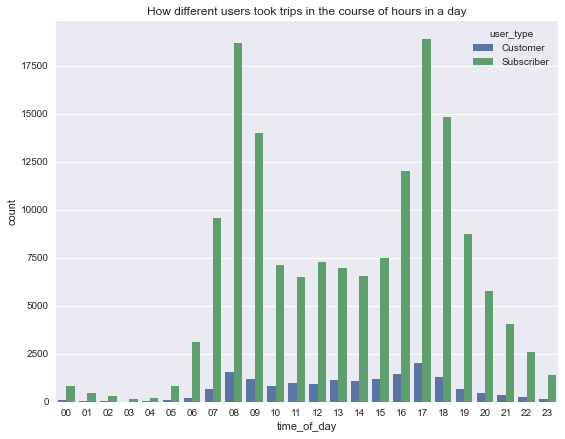

In [28]:
# Clustered plots of the user type feature in the hours of the day in the trips data
timed_order = sorted(bikedf['time_of_day'].unique());
plt.figure(figsize = (9, 7))
sns.countplot(data=bikedf, x = 'time_of_day', hue='user_type', order=timed_order);
plt.title('How different users took trips in the course of hours in a day');

Again, just like in the daily distribution, the hours that registered most ttrips were highly represented by subscribers. Which goes to show that the frequency of subscribers was high than those of unregistered customers. 

### What gender of users took the most trips?

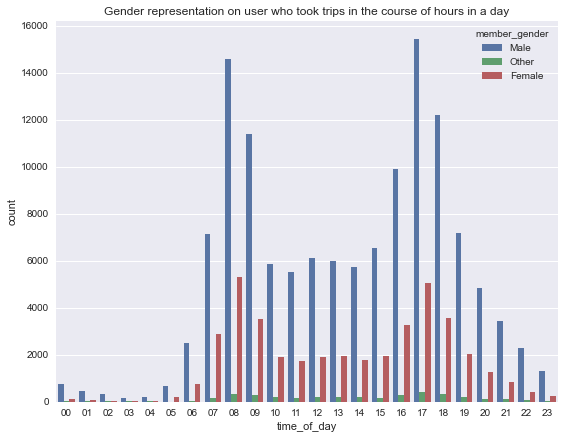

In [29]:
# Clustered plots of the users by gender featured in the hours of the day in the trips data
plt.figure(figsize = (9, 7))
sns.countplot(data=bikedf, x = 'time_of_day', hue='member_gender', order = timed_order);
plt.title('Gender representation on user who took trips in the course of hours in a day');

Users who identified as Male took the most trips as they are highy represented in the hours that most trips took place followed by female. Users who identified as other took less and less trips in the course of the days.

### How was gender represented across the user types?
Away from the trip duration and distribution how were the genders distributed across the user types?

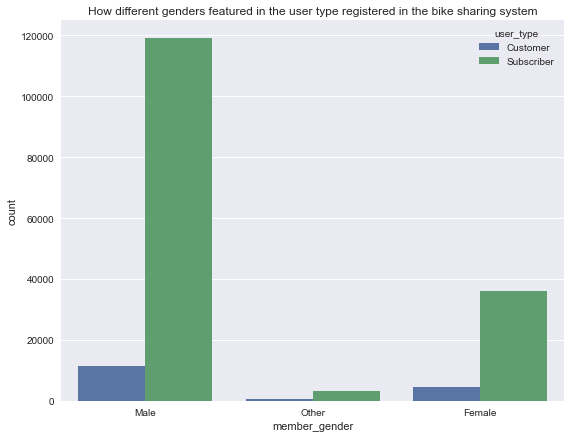

In [30]:
# Clustered plots of the users by gender featured trips data
plt.figure(figsize = (9, 7))
sns.countplot(data=bikedf, x = 'member_gender', hue='user_type');
plt.title('How different genders featured in the user type registered in the bike sharing system');

The chart shows that among the user types there were more male subscribers as compared to female or those who identified as other. However, on individual genders, subscribers were more than the unregistered customers.

### Let's look at the different user types and how they were represented gender wise in the data.

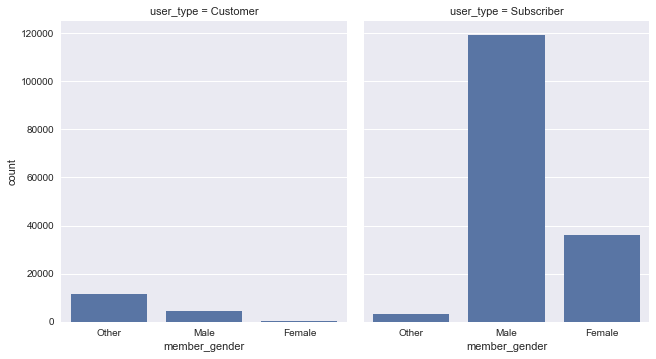

In [31]:
# A facet grid to show a how the users were distributed across different genders
d = sns.FacetGrid(data=bikedf, col = 'user_type',col_wrap = 3)
d.map(sns.countplot, 'member_gender', order=None);
d.fig.set_size_inches(14, 6);

From the grid, its clear on how the different gender groups are represented in the user type, which explains why a particular gender would feature prominently in the analysis of different feature variables.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There were less trips in the beginnng of a week, after which they would pick up as the week progressed then later slow down on weekends. Most trips were registered in the mid week or there about.
In terms of time of the day, the morinig hours of between 0800 hrs and 1100hrs were favourite for hours, then the trips would reduce and pick up toward the evening of 1700hrs and significant trips being registered to about 2000hrs then slow down. The wee hours of the night were least favourable by bikers as less and less trips were registered in these hours. 0300hrs registered the least trips.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

A particular gender and user type, primarily male subscribers took part in the most trips and were highly registered in the days and hours that the most trips took place.

## Multivariate Exploration

How were the user types represented in the trips data across the different days of the week that the trips were taken?

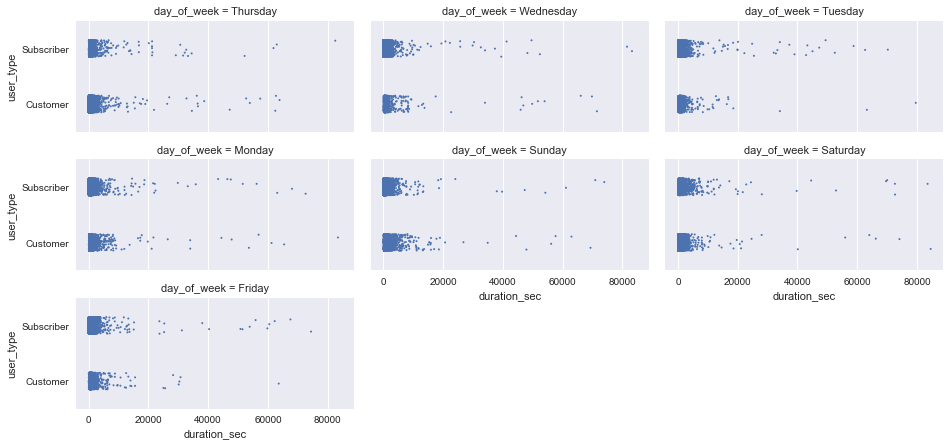

In [32]:
# Facet grid to show the relationship betweet duration of trips, day of the week and the type of the user

d = sns.FacetGrid(data=bikedf, col = 'day_of_week', col_wrap = 3)
d.map(sns.stripplot, 'duration_sec', 'user_type', size=2,jitter=0.15, order=None);
d.fig.set_size_inches(14, 6);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

It's worth noting that most trips took place in the Months of February. Looking at the distribution accross the days of the week, there was a similar trend in the type of user and their gender. It goes to show that most trips were taken on a Thursday and Tuesday and the significant number of user types were subscribed users. Further interrogation of the data shows that a good number of these users who took this trips on these particular days were Male. The relationship therefore shows subscribed male users took the most trips.

### Were there any interesting or surprising interactions between features?

The frequency of trips were not evenly distributed thoughout the day. It is surprising to see a significant number of trips being recorded in the morning hours, then this trend would change toward the noon and later pick up in the evening. Also worth noting is there bikers who took trips in the wee hours of the night.

## Conclusions



From the analysis, It goes to show that, Thursdays and Tuesdays were a favourite among bikers. On the hours of the day, it shows that between 1700hrs and 2000hrs there is a potential of high number of trips taking place. Also in the morning hours of 0800hrs and 1100 there would significant number of bikers. The least trips took place in the wee hours of the morning of between 0100hrs and 0400hrs. With this in mind, it would paramount to ensure there are enough bikes and are in good conditions as and when they are most needed.

## Limitations

1. The analysis have not explored all the given variables in the dataset and therefore their significance in the fianl outcome of the analysis cannot be deteremined. Case in point is in whether a bike being shareable or not contributed in the duration of the trip. That has not been explored in this report. Also, the significance of latitude and longitude of departure and destination have also not been explored.


2. Also not explored is whether age is a factor among the users that registered most rips. It would be important to see waht age groups are highly represented among the bikers and whether they are subscribed or not and the average duration of trips a particular age group took.


3. Also it would be interesting to determine the kind of the user types and genders of bikers who took trips in the wee hours of the morning.

## References

1. Udacity Course materials.
2. https://pandas.pydata.org/docs/user_guide/timeseries.html